# 01_eda

## Importando bibliotecas

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados

In [ ]:
# Carregando os dados
df = pd.read_csv('../data/raw/data.csv', encoding='ISO-8859-1')

## Processamento

In [3]:
# Visualizando as primeiras linhas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Verificando valores ausentes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Removendo registros com CustomerID ausente
df = df[df['CustomerID'].notnull()]

In [7]:
# Convertendo datas
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\heitor\AppData\Local\Temp\ipykernel_20504\4143427631.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()


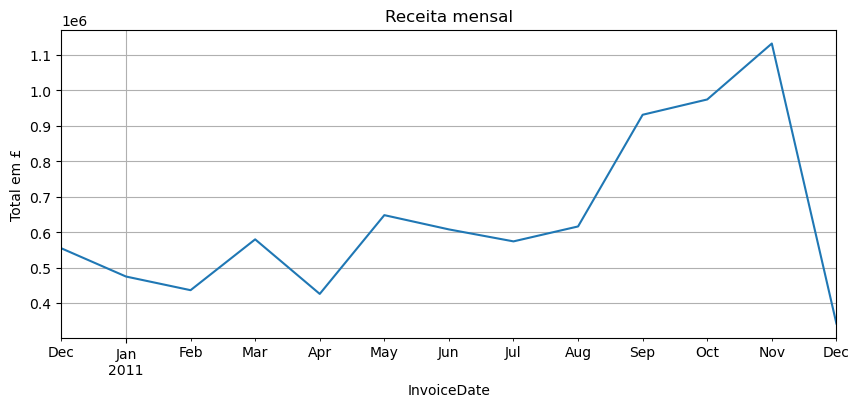

In [8]:
# Análise geral de vendas
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

# Gráfico de receita mensal
plt.figure(figsize=(10, 4))
monthly_sales.plot()
plt.title('Receita mensal')
plt.ylabel('Total em £')
plt.grid()
plt.show()